In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
!unzip MFI-WHU.zip

Archive:  MFI-WHU.zip
   creating: MFI-WHU/
   creating: MFI-WHU/full_clear/
  inflating: MFI-WHU/full_clear/1.jpg  
  inflating: MFI-WHU/full_clear/10.jpg  
  inflating: MFI-WHU/full_clear/100.jpg  
  inflating: MFI-WHU/full_clear/101.jpg  
  inflating: MFI-WHU/full_clear/102.jpg  
  inflating: MFI-WHU/full_clear/103.jpg  
  inflating: MFI-WHU/full_clear/104.jpg  
  inflating: MFI-WHU/full_clear/105.jpg  
  inflating: MFI-WHU/full_clear/106.jpg  
  inflating: MFI-WHU/full_clear/107.jpg  
  inflating: MFI-WHU/full_clear/108.jpg  
  inflating: MFI-WHU/full_clear/109.jpg  
  inflating: MFI-WHU/full_clear/11.jpg  
  inflating: MFI-WHU/full_clear/110.jpg  
  inflating: MFI-WHU/full_clear/111.jpg  
  inflating: MFI-WHU/full_clear/112.jpg  
  inflating: MFI-WHU/full_clear/113.jpg  
  inflating: MFI-WHU/full_clear/114.jpg  
  inflating: MFI-WHU/full_clear/115.jpg  
  inflating: MFI-WHU/full_clear/116.jpg  
  inflating: MFI-WHU/full_clear/117.jpg  
  inflating: MFI-WHU/full_clear/118.jpg  
  i

In [3]:
base_path = '/content/MFI-WHU'

In [4]:
folder1 = os.path.join(base_path, 'source_1')
folder2 = os.path.join(base_path, 'source_2')
output_dir = os.path.join(base_path, 'Moji_Rezultati')

In [5]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Kreirana mapa: {output_dir}")

Kreirana mapa: /content/MFI-WHU/Moji_Rezultati


In [6]:
def get_focus_map(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
    abs_laplacian = np.absolute(laplacian)
    return cv2.GaussianBlur(abs_laplacian, (15, 15), 0)

In [7]:
slike = sorted([f for f in os.listdir(folder1) if f.endswith('.jpg')])

print(f"Započinjem obradu {len(slike)} parova slika...")

for filename in slike:
    img1 = cv2.imread(os.path.join(folder1, filename))
    img2 = cv2.imread(os.path.join(folder2, filename))

    if img1 is not None and img2 is not None:
        fm1 = get_focus_map(img1)
        fm2 = get_focus_map(img2)

        mask = (fm1 > fm2).astype(np.uint8)
        mask_3d = cv2.merge([mask, mask, mask])
        output = img1 * mask_3d + img2 * (1 - mask_3d)

        output_path = os.path.join(output_dir, f'stacked_{filename}')
        cv2.imwrite(output_path, output)
        print(f"Obrada završena: {filename} -> stacked_{filename}")
    else:
        print(f"Greška kod učitavanja slike: {filename}")

print("\nSve slike su uspješno obrađene! Pogledaj mapu 'Moji_Rezultati' na svom Disku.")

Započinjem obradu 120 parova slika...
Obrada završena: 1.jpg -> stacked_1.jpg
Obrada završena: 10.jpg -> stacked_10.jpg
Obrada završena: 100.jpg -> stacked_100.jpg
Obrada završena: 101.jpg -> stacked_101.jpg
Obrada završena: 102.jpg -> stacked_102.jpg
Obrada završena: 103.jpg -> stacked_103.jpg
Obrada završena: 104.jpg -> stacked_104.jpg
Obrada završena: 105.jpg -> stacked_105.jpg
Obrada završena: 106.jpg -> stacked_106.jpg
Obrada završena: 107.jpg -> stacked_107.jpg
Obrada završena: 108.jpg -> stacked_108.jpg
Obrada završena: 109.jpg -> stacked_109.jpg
Obrada završena: 11.jpg -> stacked_11.jpg
Obrada završena: 110.jpg -> stacked_110.jpg
Obrada završena: 111.jpg -> stacked_111.jpg
Obrada završena: 112.jpg -> stacked_112.jpg
Obrada završena: 113.jpg -> stacked_113.jpg
Obrada završena: 114.jpg -> stacked_114.jpg
Obrada završena: 115.jpg -> stacked_115.jpg
Obrada završena: 116.jpg -> stacked_116.jpg
Obrada završena: 117.jpg -> stacked_117.jpg
Obrada završena: 118.jpg -> stacked_118.jpg
Ob

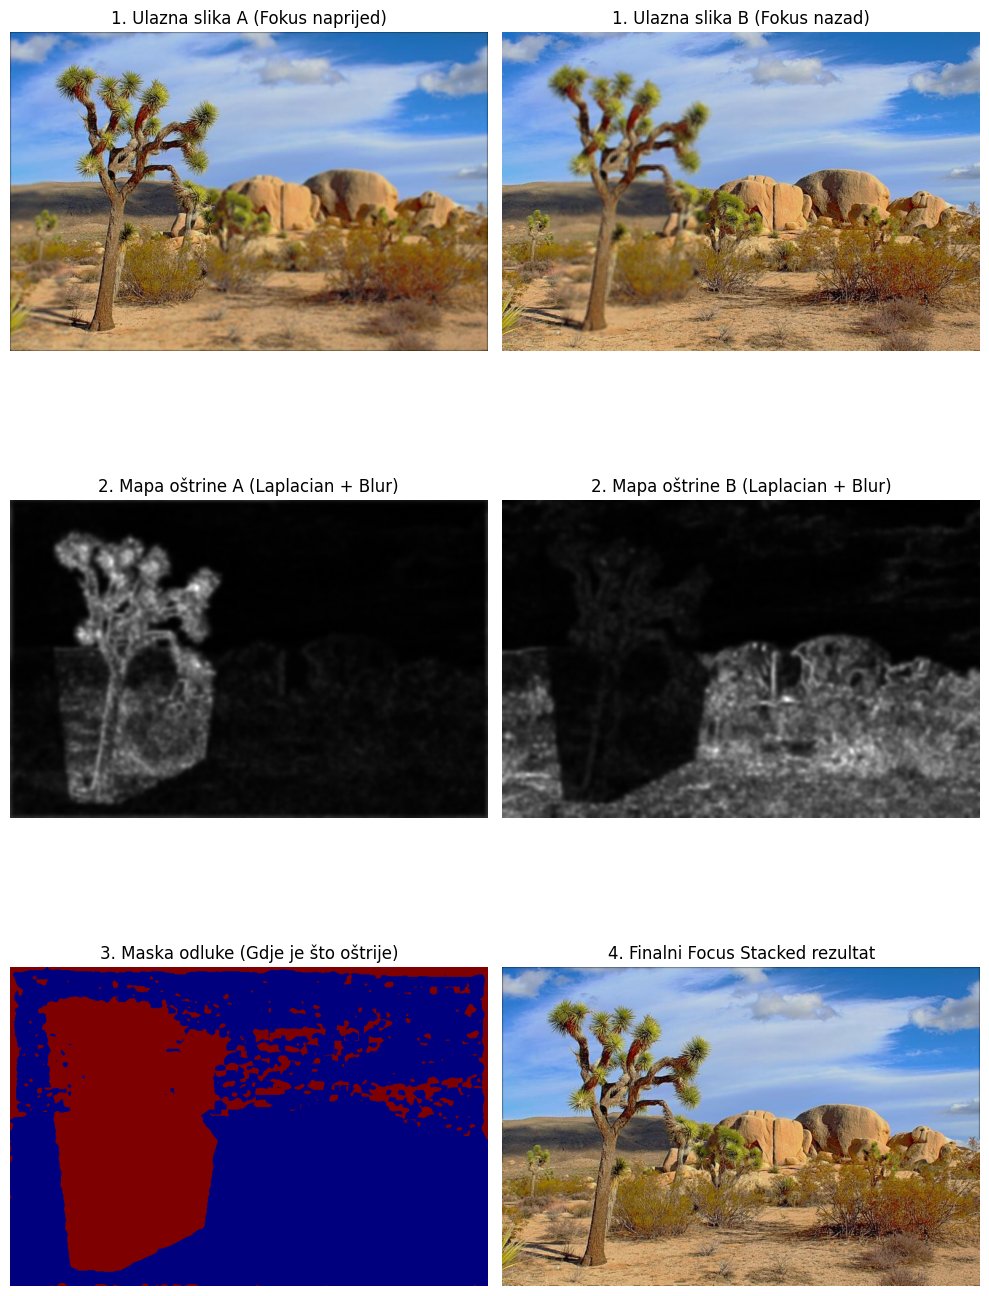

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

base_path = '/content/MFI-WHU'
img_name = '1.jpg'

img1 = cv2.imread(os.path.join(base_path, 'source_1', img_name))
img2 = cv2.imread(os.path.join(base_path, 'source_2', img_name))

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

lap1 = cv2.Laplacian(gray1, cv2.CV_64F, ksize=3)
lap2 = cv2.Laplacian(gray2, cv2.CV_64F, ksize=3)

fm1 = cv2.GaussianBlur(np.absolute(lap1), (15, 15), 0)
fm2 = cv2.GaussianBlur(np.absolute(lap2), (15, 15), 0)

mask = (fm1 > fm2).astype(np.uint8)

mask_3d = cv2.merge([mask, mask, mask])
output = img1 * mask_3d + img2 * (1 - mask_3d)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("1. Ulazna slika A (Fokus naprijed)")
axes[0, 1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("1. Ulazna slika B (Fokus nazad)")

# Focus Measures
axes[1, 0].imshow(fm1, cmap='gray')
axes[1, 0].set_title("2. Mapa oštrine A (Laplacian + Blur)")
axes[1, 1].imshow(fm2, cmap='gray')
axes[1, 1].set_title("2. Mapa oštrine B (Laplacian + Blur)")

axes[2, 0].imshow(mask, cmap='jet')
axes[2, 0].set_title("3. Maska odluke (Gdje je što oštrije)")
axes[2, 1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axes[2, 1].set_title("4. Finalni Focus Stacked rezultat")

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()